# Model evaluation speed check

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f_single(x, mean, sigma):
    x = (x - mean) / (sigma + 1)
    val = np.exp(- 0.5 * x * x)
    return val

def f_total(x, pars):
    v = np.zeros_like(x, dtype=float)
    for par in pars:
        v += f_single(x, *par)
    return v

In [3]:
def compute_method1(x, pars):
    # outer loop models
    # inner loop pixels
    v = np.zeros_like(x, dtype=float)
    for par in pars:
        for ii in range(len(x)):
            v[ii] += f_single(x[ii], *par)
    return v
        
def compute_method2(x, pars):
    # outer loop pixels
    # inner loop models
    v = np.zeros_like(x, dtype=float)
    for ii in range(len(v)):
        v[ii] += f_total(x[ii], pars)
    return v

def compute_method3(x, pars):
    # outer loop models
    # inner loop pixels
    v = np.zeros_like(x, dtype=float)
    for par in pars:
        v += f_single(x, *par)
    return v

def compute_method4(x, pars):
    v = f_total(x, pars)
    return v

In [4]:
n_pix = int(1e4)
n_model = 10

x = np.arange(n_pix, dtype=float)
pars = [(i * n_pix / n_model, n_pix / (10. * n_model)) for i in range(n_model)]

v1 = compute_method1(x, pars)
v2 = compute_method2(x, pars)
v3 = compute_method3(x, pars)
v4 = compute_method4(x, pars)

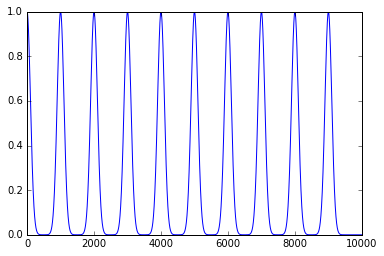

In [5]:
plt.plot(v1)

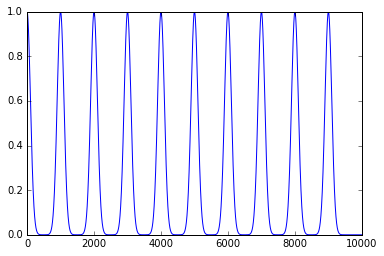

In [6]:
plt.plot(v2)

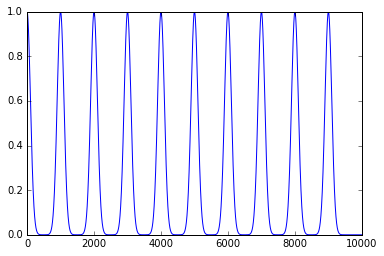

In [7]:
plt.plot(v3)

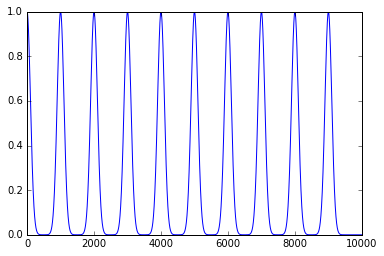

In [8]:
plt.plot(v4)

In [9]:
%timeit compute_method1(x, pars)

1 loop, best of 3: 262 ms per loop


In [10]:
%timeit compute_method2(x, pars)

1 loop, best of 3: 448 ms per loop


In [11]:
%timeit compute_method3(x, pars)

1000 loops, best of 3: 1.33 ms per loop


In [12]:
%timeit compute_method4(x, pars)

1000 loops, best of 3: 1.32 ms per loop


Conclusions:

* since model evaluation is fast, the pixel loop has to be in C (or at least numpy expression) to be fast
* if the model and pixel loop were in C, the order of the loops probably wouldn't matter much